In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import drive
#drive.mount('/content/drive') 

#### **Dataset used: https://archive.ics.uci.edu/ml/datasets/BlogFeedback**

In [2]:
#loading data
data=pd.read_csv("blogData_train.csv")
data.head()

40.30467  53.845657  0.0  401.0  15.0  15.52416  32.44188  0.0.1  377.0  \
0  40.30467  53.845657  0.0  401.0  15.0  15.52416  32.44188    0.0  377.0   
1  40.30467  53.845657  0.0  401.0  15.0  15.52416  32.44188    0.0  377.0   
2  40.30467  53.845657  0.0  401.0  15.0  15.52416  32.44188    0.0  377.0   
3  40.30467  53.845657  0.0  401.0  15.0  15.52416  32.44188    0.0  377.0   
4  40.30467  53.845657  0.0  401.0  15.0  15.52416  32.44188    0.0  377.0   

   3.0  ...  0.0.229  1.0.1  0.0.230  0.0.231  0.0.232  0.0.233  0.0.234  \
0  3.0  ...      1.0    0.0      0.0      0.0      0.0      0.0      0.0   
1  3.0  ...      1.0    0.0      0.0      0.0      0.0      0.0      0.0   
2  3.0  ...      0.0    1.0      0.0      0.0      0.0      0.0      0.0   
3  3.0  ...      0.0    1.0      0.0      0.0      0.0      0.0      0.0   
4  3.0  ...      1.0    0.0      0.0      0.0      0.0      0.0      0.0   

   0.0.235  0.0.236  1.0.2  
0      0.0      0.0    0.0  
1      0.0      0.0    0.0  
2      0.0      0.0    1.0  
3      0.0      0.0   27.0  
4      0.0      0.0    0.0  

[5 rows x 281 columns]

The features for this dataset are not labeled. Instead, they were placed  in a seperate file. To make working with this dataset easier, the next piece of code will add the feature names as columns to the dataset.

In [3]:
#Naming the attributes (pushing the name list into the dataset as the attribute names)
att=[]
for i in ['total','last24h','24-48h','first24h','difference',
           'total_tr','last24h_tr','24-48h_tr','first24h_tr','difference_tr']:
    att1 = 'blog_avg_' + str(i)
    att2 = 'blog_std_' + str(i)
    att3 = 'blog_min_' + str(i)
    att4 = 'blog_max_' + str(i)
    att5 = 'blog_median_' + str(i)
    att.extend([att1,att2,att3,att4,att5])

att51_62 = ['total','last24h','24-48h','first24h','difference',
           'total_tr','last24h_tr','24-48h_tr','first24h_tr','difference_tr',
           'time_first_post','lenght_post']
att.extend(att51_62)

for i in range(63,263):
    att_word = 'word' + str(i-62)
    att.extend([att_word])

att263_281 = ['Mon_bl','Tue_bl','Wed_bl','Thu_bl','Fri_bl','Sat_bl','Sun_bl',
             'Mon_post','Tue_post','Wed_post','Thu_post','Fri_post','Sat_post','Sun_post',
             'parent_pages','min_parent','max_parent','avg_parent','target']
att.extend(att263_281)
data.set_axis(att, axis=1, inplace=True)
data

blog_avg_total  blog_std_total  blog_min_total  blog_max_total  \
0            40.30467       53.845657             0.0           401.0   
1            40.30467       53.845657             0.0           401.0   
2            40.30467       53.845657             0.0           401.0   
3            40.30467       53.845657             0.0           401.0   
4            40.30467       53.845657             0.0           401.0   
...               ...             ...             ...             ...   
52391        33.00000        0.000000            33.0            33.0   
52392        33.00000        0.000000            33.0            33.0   
52393         0.00000        0.000000             0.0             0.0   
52394         0.00000        0.000000             0.0             0.0   
52395         0.00000        0.000000             0.0             0.0   

       blog_median_total  blog_avg_last24h  blog_std_last24h  \
0                   15.0          15.52416         32.441880   
1                   15.0          15.52416         32.441880   
2                   15.0          15.52416         32.441880   
3                   15.0          15.52416         32.441880   
4                   15.0          15.52416         32.441880   
...                  ...               ...               ...   
52391               33.0          11.00000         15.556349   
52392               33.0          11.00000         15.556349   
52393                0.0           0.00000          0.000000   
52394                0.0           0.00000          0.000000   
52395                0.0           0.00000          0.000000   

       blog_min_last24h  blog_max_last24h  blog_median_last24h  ...  Wed_post  \
0                   0.0             377.0                  3.0  ...       1.0   
1                   0.0             377.0                  3.0  ...       1.0   
2                   0.0             377.0                  3.0  ...       0.0   
3                   0.0             377.0                  3.0  ...       0.0   
4                   0.0             377.0                  3.0  ...       1.0   
...                 ...               ...                  ...  ...       ...   
52391               0.0              33.0                  0.0  ...       0.0   
52392               0.0              33.0                  0.0  ...       0.0   
52393               0.0               0.0                  0.0  ...       0.0   
52394               0.0               0.0                  0.0  ...       0.0   
52395               0.0               0.0                  0.0  ...       0.0   

       Thu_post  Fri_post  Sat_post  Sun_post  parent_pages  min_parent  \
0           0.0       0.0       0.0       0.0           0.0         0.0   
1           0.0       0.0       0.0       0.0           0.0         0.0   
2           1.0       0.0       0.0       0.0           0.0         0.0   
3           1.0       0.0       0.0       0.0           0.0         0.0   
4           0.0       0.0       0.0       0.0           0.0         0.0   
...         ...       ...       ...       ...           ...         ...   
52391       0.0       0.0       0.0       0.0           0.0         0.0   
52392       0.0       0.0       0.0       0.0           0.0         0.0   
52393       1.0       0.0       0.0       0.0           0.0         0.0   
52394       1.0       0.0       0.0       0.0           0.0         0.0   
52395       1.0       0.0       0.0       0.0           0.0         0.0   

       max_parent  avg_parent  target  
0             0.0         0.0     0.0  
1             0.0         0.0     0.0  
2             0.0         0.0     1.0  
3             0.0         0.0    27.0  
4             0.0         0.0     0.0  
...           ...         ...     ...  
52391         0.0         0.0     0.0  
52392         0.0         0.0     0.0  
52393         0.0         0.0     0.0  
52394         0.0         0.0     0.0  
52395         0.0         0.0     0.0  

[52396

#### Data Exploration: deep dive into the data


In [4]:
data.shape

(52396, 281)

In [5]:
data.columns

Index(['blog_avg_total', 'blog_std_total', 'blog_min_total', 'blog_max_total',
       'blog_median_total', 'blog_avg_last24h', 'blog_std_last24h',
       'blog_min_last24h', 'blog_max_last24h', 'blog_median_last24h',
       ...
       'Wed_post', 'Thu_post', 'Fri_post', 'Sat_post', 'Sun_post',
       'parent_pages', 'min_parent', 'max_parent', 'avg_parent', 'target'],
      dtype='object', length=281)

In [6]:
data.describe()

blog_avg_total  blog_std_total  blog_min_total  blog_max_total  \
count    52396.000000    52396.000000    52396.000000    52396.000000   
mean        39.444150       46.806583        0.358921      339.851935   
std         79.122576       62.360584        6.840782      441.434240   
min          0.000000        0.000000        0.000000        0.000000   
25%          2.285714        5.214318        0.000000       29.000000   
50%         10.630660       19.353120        0.000000      162.000000   
75%         40.304670       77.442830        0.000000      478.000000   
max       1122.666600      559.432600      726.000000     2044.000000   

       blog_median_total  blog_avg_last24h  blog_std_last24h  \
count       52396.000000      52396.000000      52396.000000   
mean           24.681846         15.214605         27.959073   
std            69.599628         32.251497         38.584376   
min             0.000000          0.000000          0.000000   
25%             0.000000          0.891566          3.075076   
50%             4.000000          4.150685         11.051215   
75%            15.000000         15.998589         45.701206   
max          1314.000000        442.666660        359.530060   

       blog_min_last24h  blog_max_last24h  blog_median_last24h  ...  \
count      52396.000000      52396.000000         52396.000000  ...   
mean           0.002748        258.663772             5.829205  ...   
std            0.131904        321.350703            23.768541  ...   
min            0.000000          0.000000             0.000000  ...   
25%            0.000000         22.000000             0.000000  ...   
50%            0.000000        121.000000             1.000000  ...   
75%            0.000000        387.000000             2.000000  ...   
max           14.000000       1424.000000           588.000000  ...   

           Wed_post      Thu_post      Fri_post      Sat_post      Sun_post  \
count  52396.000000  52396.000000  52396.000000  52396.000000  52396.000000   
mean       0.171330      0.162226      0.154458      0.096152      0.088919   
std        0.376801      0.368662      0.361391      0.294803      0.284630   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       parent_pages  min_parent    max_parent    avg_parent        target  
count  52396.000000     52396.0  52396.000000  52396.000000  52396.000000  
mean       0.119169         0.0      1.242118      0.769520      6.764829  
std        1.438207         0.0     27.498241     20.338246     37.706916  
min        0.000000         0.0      0.000000      0.000000      0.000000  
25%        0.000000         0.0      0.000000      0.000000      0.000000  
50%        0.000000         0.0      0.000000      0.000000      0.000000  
75%        0.000000         0.0      0.000000      0.000000      1.000000  
max      136.000000         0.0   1778.000000   1778.000000   1424.000000  

[8 rows x 281 columns]

In [7]:
data.dtypes

blog_avg_total       float64
blog_std_total       float64
blog_min_total       float64
blog_max_total       float64
blog_median_total    float64
                      ...   
parent_pages         float64
min_parent           float64
max_parent           float64
avg_parent           float64
target               float64
Length: 281, dtype: object

#### Data Cleaning

Section 1:
First, data will be split across five segments numbered from 1 to 5. Then, the data will be visualized in a heatmap to check for missing values.

In [8]:
data.isnull().sum()

blog_avg_total       0
blog_std_total       0
blog_min_total       0
blog_max_total       0
blog_median_total    0
                    ..
parent_pages         0
min_parent           0
max_parent           0
avg_parent           0
target               0
Length: 281, dtype: int64

As shown in the previous heatmaps, there are no missing values in this dataset.

Next, the features will 0 variance will be dropped as they provide no useful information that the ML model can learn patterns from.

In [9]:
#Dropping low variance values (low variance)
data.drop(data.var()[data.var() == 0].index.values, axis=1, inplace=True)
data.var()

blog_avg_total         6260.382077
blog_std_total         3888.842401
blog_min_total           46.796300
blog_max_total       194864.188516
blog_median_total      4844.108157
                         ...      
Sun_post                  0.081014
parent_pages              2.068440
max_parent              756.153268
avg_parent              413.644261
target                 1421.811513
Length: 277, dtype: float64

In [10]:
#Removing Duplicates to avoid redunducy
data.duplicated().sum()

3193

In [11]:
data.drop_duplicates(keep='first')

blog_avg_total  blog_std_total  blog_min_total  blog_max_total  \
0            40.30467       53.845657             0.0           401.0   
2            40.30467       53.845657             0.0           401.0   
3            40.30467       53.845657             0.0           401.0   
4            40.30467       53.845657             0.0           401.0   
7            40.30467       53.845657             0.0           401.0   
...               ...             ...             ...             ...   
52391        33.00000        0.000000            33.0            33.0   
52392        33.00000        0.000000            33.0            33.0   
52393         0.00000        0.000000             0.0             0.0   
52394         0.00000        0.000000             0.0             0.0   
52395         0.00000        0.000000             0.0             0.0   

       blog_median_total  blog_avg_last24h  blog_std_last24h  \
0                   15.0          15.52416         32.441880   
2                   15.0          15.52416         32.441880   
3                   15.0          15.52416         32.441880   
4                   15.0          15.52416         32.441880   
7                   15.0          15.52416         32.441880   
...                  ...               ...               ...   
52391               33.0          11.00000         15.556349   
52392               33.0          11.00000         15.556349   
52393                0.0           0.00000          0.000000   
52394                0.0           0.00000          0.000000   
52395                0.0           0.00000          0.000000   

       blog_min_last24h  blog_max_last24h  blog_median_last24h  ...  Tue_post  \
0                   0.0             377.0                  3.0  ...       0.0   
2                   0.0             377.0                  3.0  ...       0.0   
3                   0.0             377.0                  3.0  ...       0.0   
4                   0.0             377.0                  3.0  ...       0.0   
7                   0.0             377.0                  3.0  ...       0.0   
...                 ...               ...                  ...  ...       ...   
52391               0.0              33.0                  0.0  ...       0.0   
52392               0.0              33.0                  0.0  ...       0.0   
52393               0.0               0.0                  0.0  ...       0.0   
52394               0.0               0.0                  0.0  ...       0.0   
52395               0.0               0.0                  0.0  ...       0.0   

       Wed_post  Thu_post  Fri_post  Sat_post  Sun_post  parent_pages  \
0           1.0       0.0       0.0       0.0       0.0           0.0   
2           0.0       1.0       0.0       0.0       0.0           0.0   
3           0.0       1.0       0.0       0.0       0.0           0.0   
4           1.0       0.0       0.0       0.0       0.0           0.0   
7           0.0       1.0       0.0       0.0       0.0           0.0   
...         ...       ...       ...       ...       ...           ...   
52391       0.0       0.0       0.0       0.0       0.0           0.0   
52392       0.0       0.0       0.0       0.0       0.0           0.0   
52393       0.0       1.0       0.0       0.0       0.0           0.0   
52394       0.0       1.0       0.0       0.0       0.0           0.0   
52395       0.0       1.0       0.0       0.0       0.0           0.0   

       max_parent  avg_parent  target  
0             0.0         0.0     0.0  
2             0.0         0.0     1.0  
3             0.0         0.0    27.0  
4             0.0         0.0     0.0  
7             0.0         0.0     9.0  
...           ...         ...     ...  
52391         0.0         0.0     0.0  
52392         0.0         0.0     0.0  
52393         0.0         0.0     0.0  
52394         0.0         0.0     0.0  
52395         0.0         0.0     0.0  

[49203 rows x 277 columns]

Next, 5 heatmaps will visualized to view the correlation between the features in each data segment. 

In [12]:
#Using heatmap to identify the missing values 
#We split the dataset so we can see all the potential outliers
data1=data.iloc[: , 0:50]
data2=data.iloc[: , 50:100]
data3=data.iloc[: , 100:150]
data3=data.iloc[: , 150:200]
data4=data.iloc[: , 200:250]
data5=data.iloc[: , 250:281]

Text(0.5, 1.0, 'Any Other Data Correlation?')

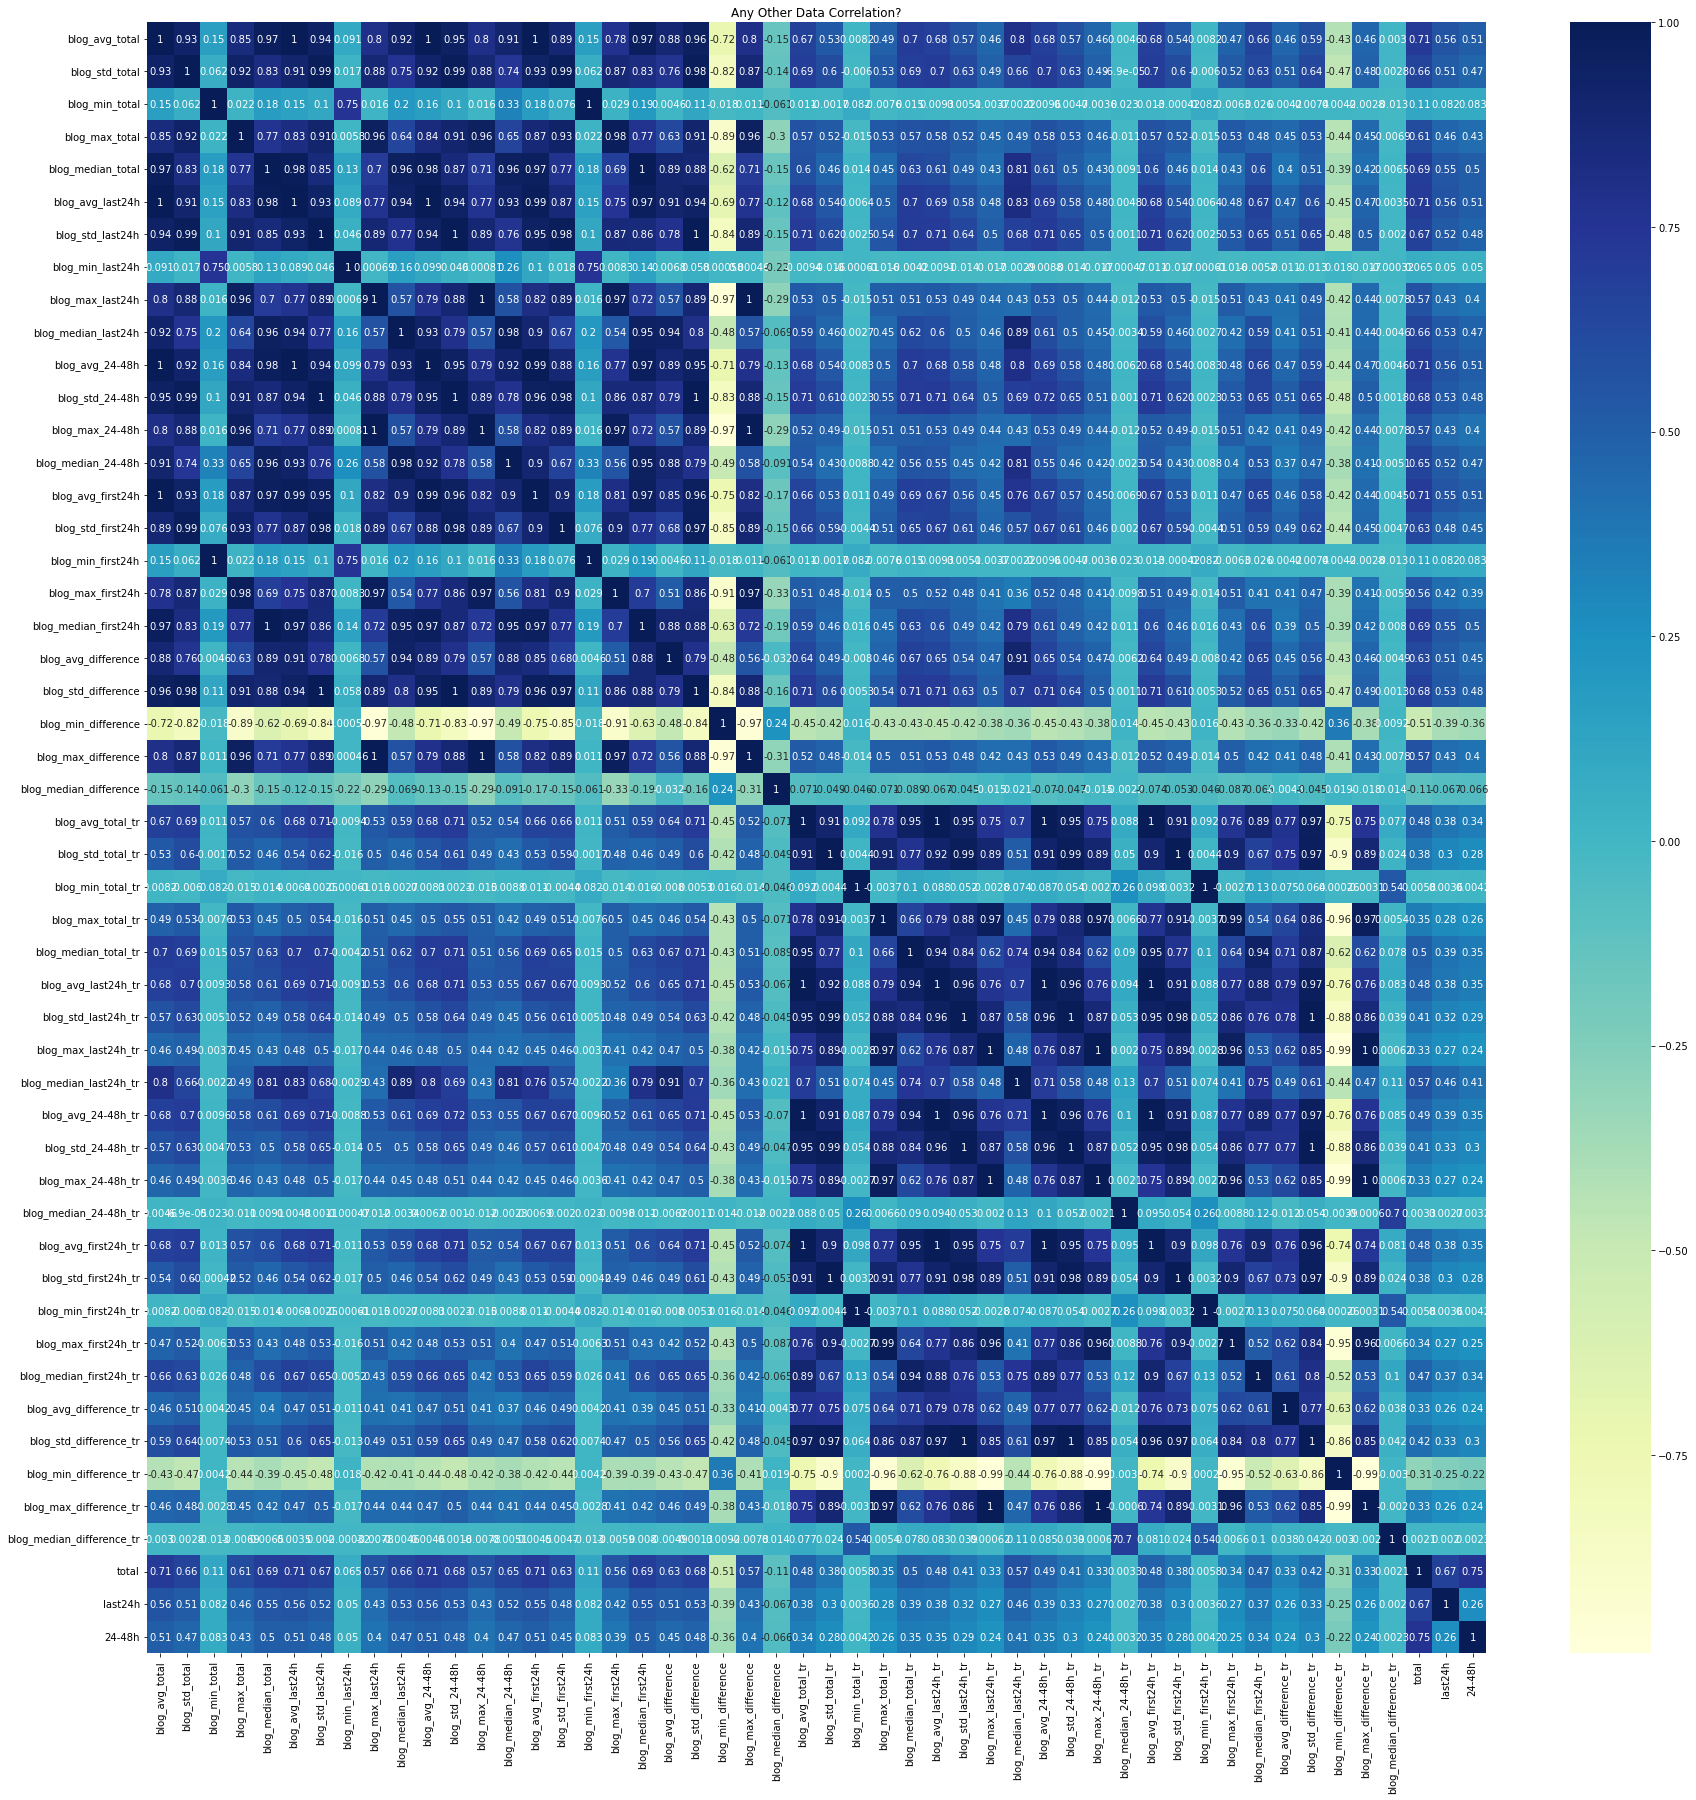

In [13]:
plt.figure(figsize=(30,30))
sns.heatmap(data1.corr(), annot=True, cmap="YlGnBu").set_title('Any Other Data Correlation?')

Features from "blog_avg_last24h" to "blog_median_first24h" will be dropped as they are redundant. The features regarding the total days and difference between 24h and 48h features are already sufficient.

In [14]:
data.drop(data.iloc[:,5:19], inplace=True, axis=1) 
data.shape

(52396, 263)

Text(0.5, 1.0, 'Any Other Data Correlation?')

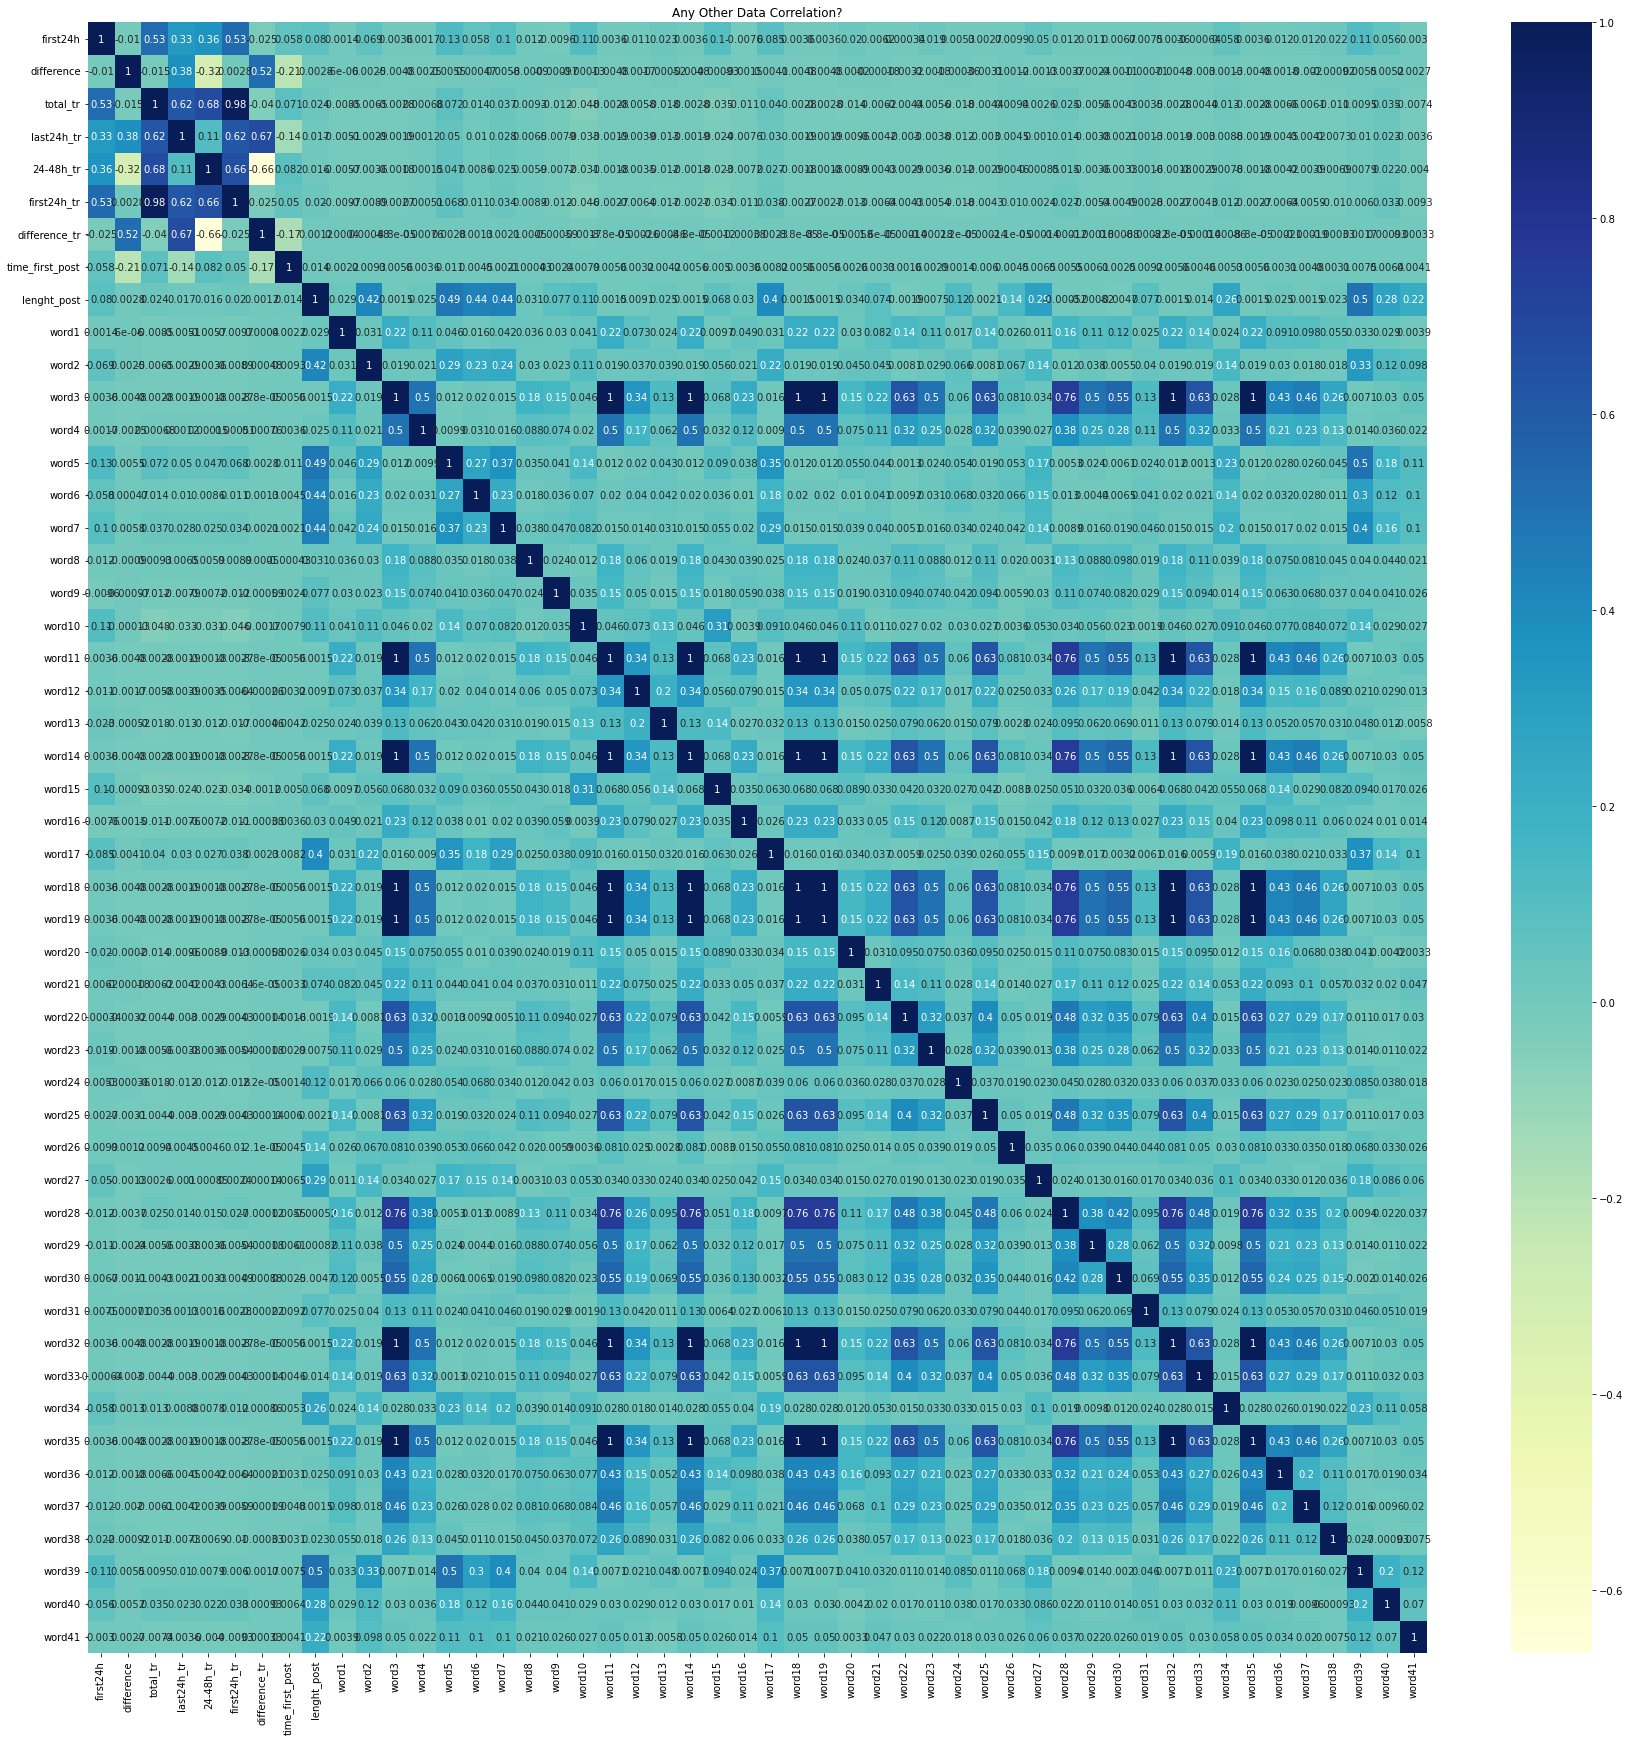

In [15]:
plt.figure(figsize=(30,30))
sns.heatmap(data2.corr(), annot=True, cmap="YlGnBu").set_title('Any Other Data Correlation?')

Text(0.5, 1.0, 'Any Other Data Correlation?')

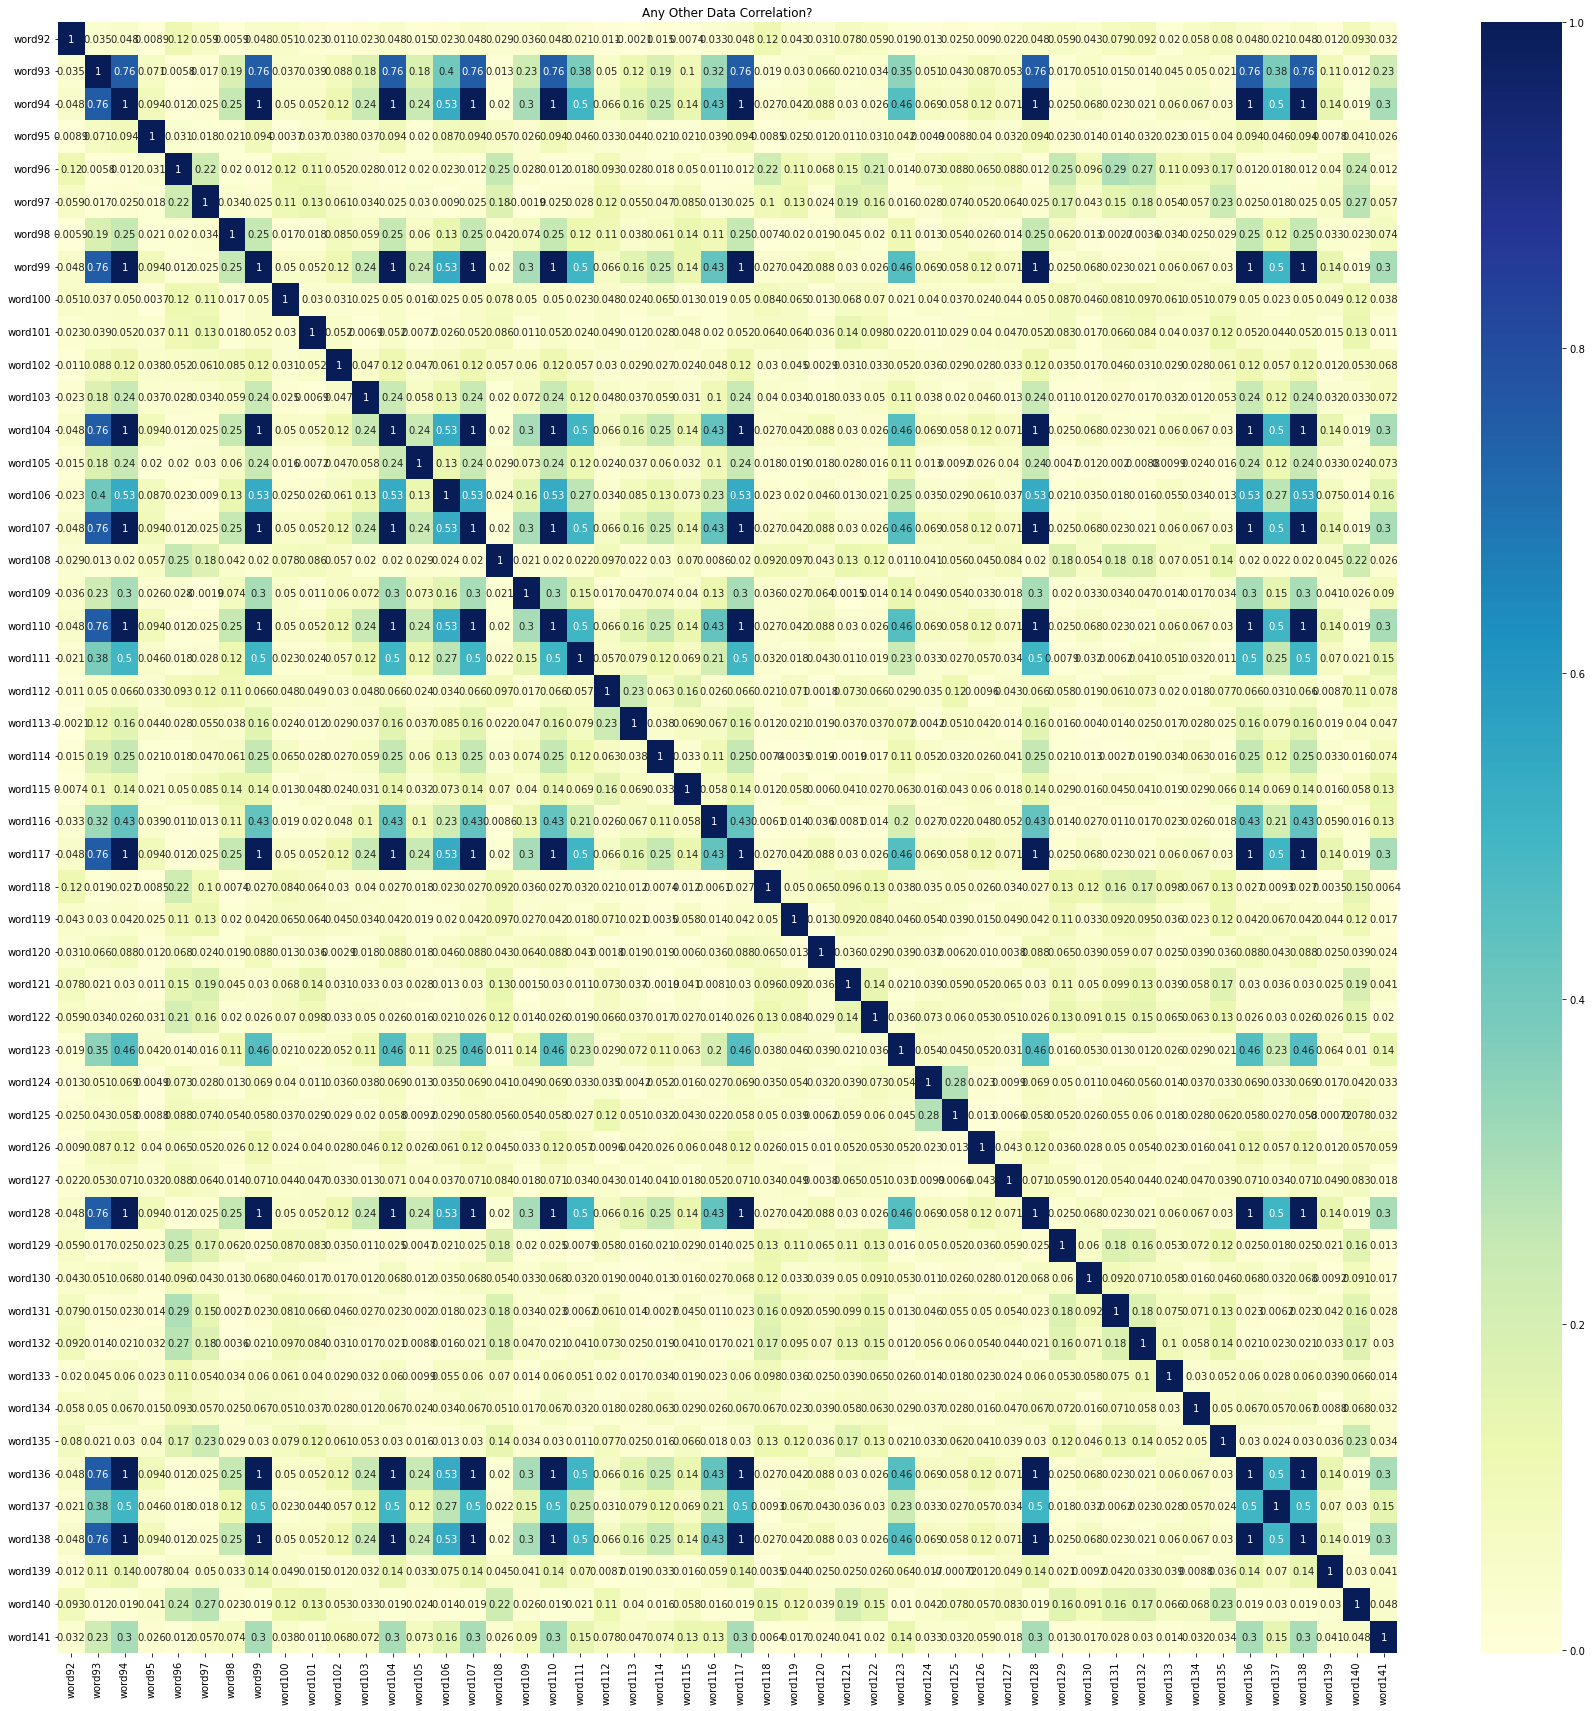

In [16]:
plt.figure(figsize=(30,30))
sns.heatmap(data3.corr(), annot=True, cmap="YlGnBu").set_title('Any Other Data Correlation?')

Text(0.5, 1.0, 'Any Other Data Correlation?')

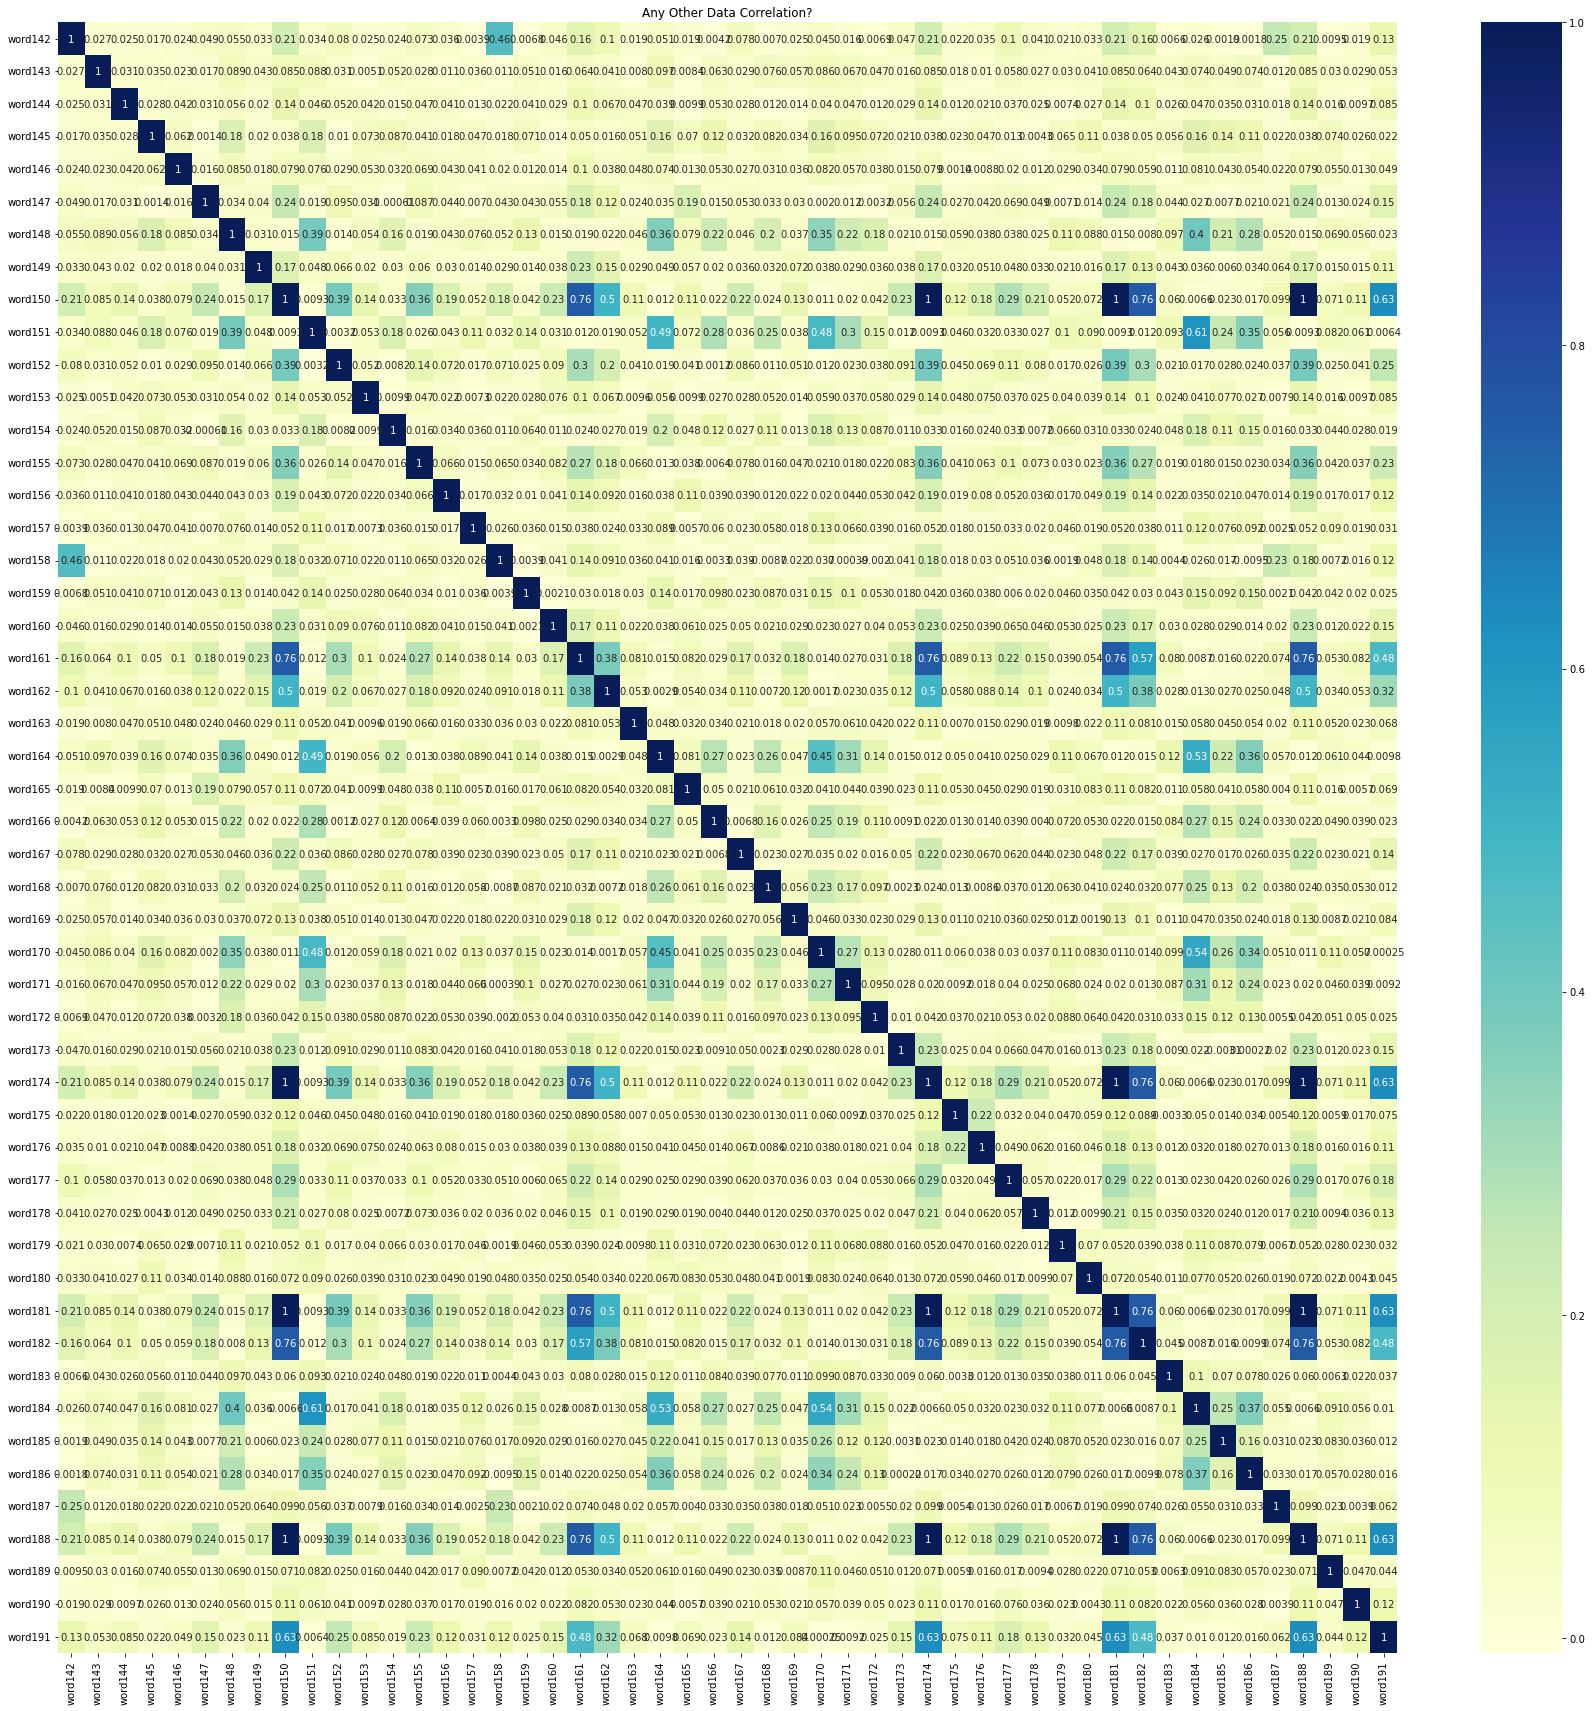

In [17]:
plt.figure(figsize=(30,30))
sns.heatmap(data4.corr(), annot=True, cmap="YlGnBu").set_title('Any Other Data Correlation?')

Text(0.5, 1.0, 'Any Other Data Correlation?')

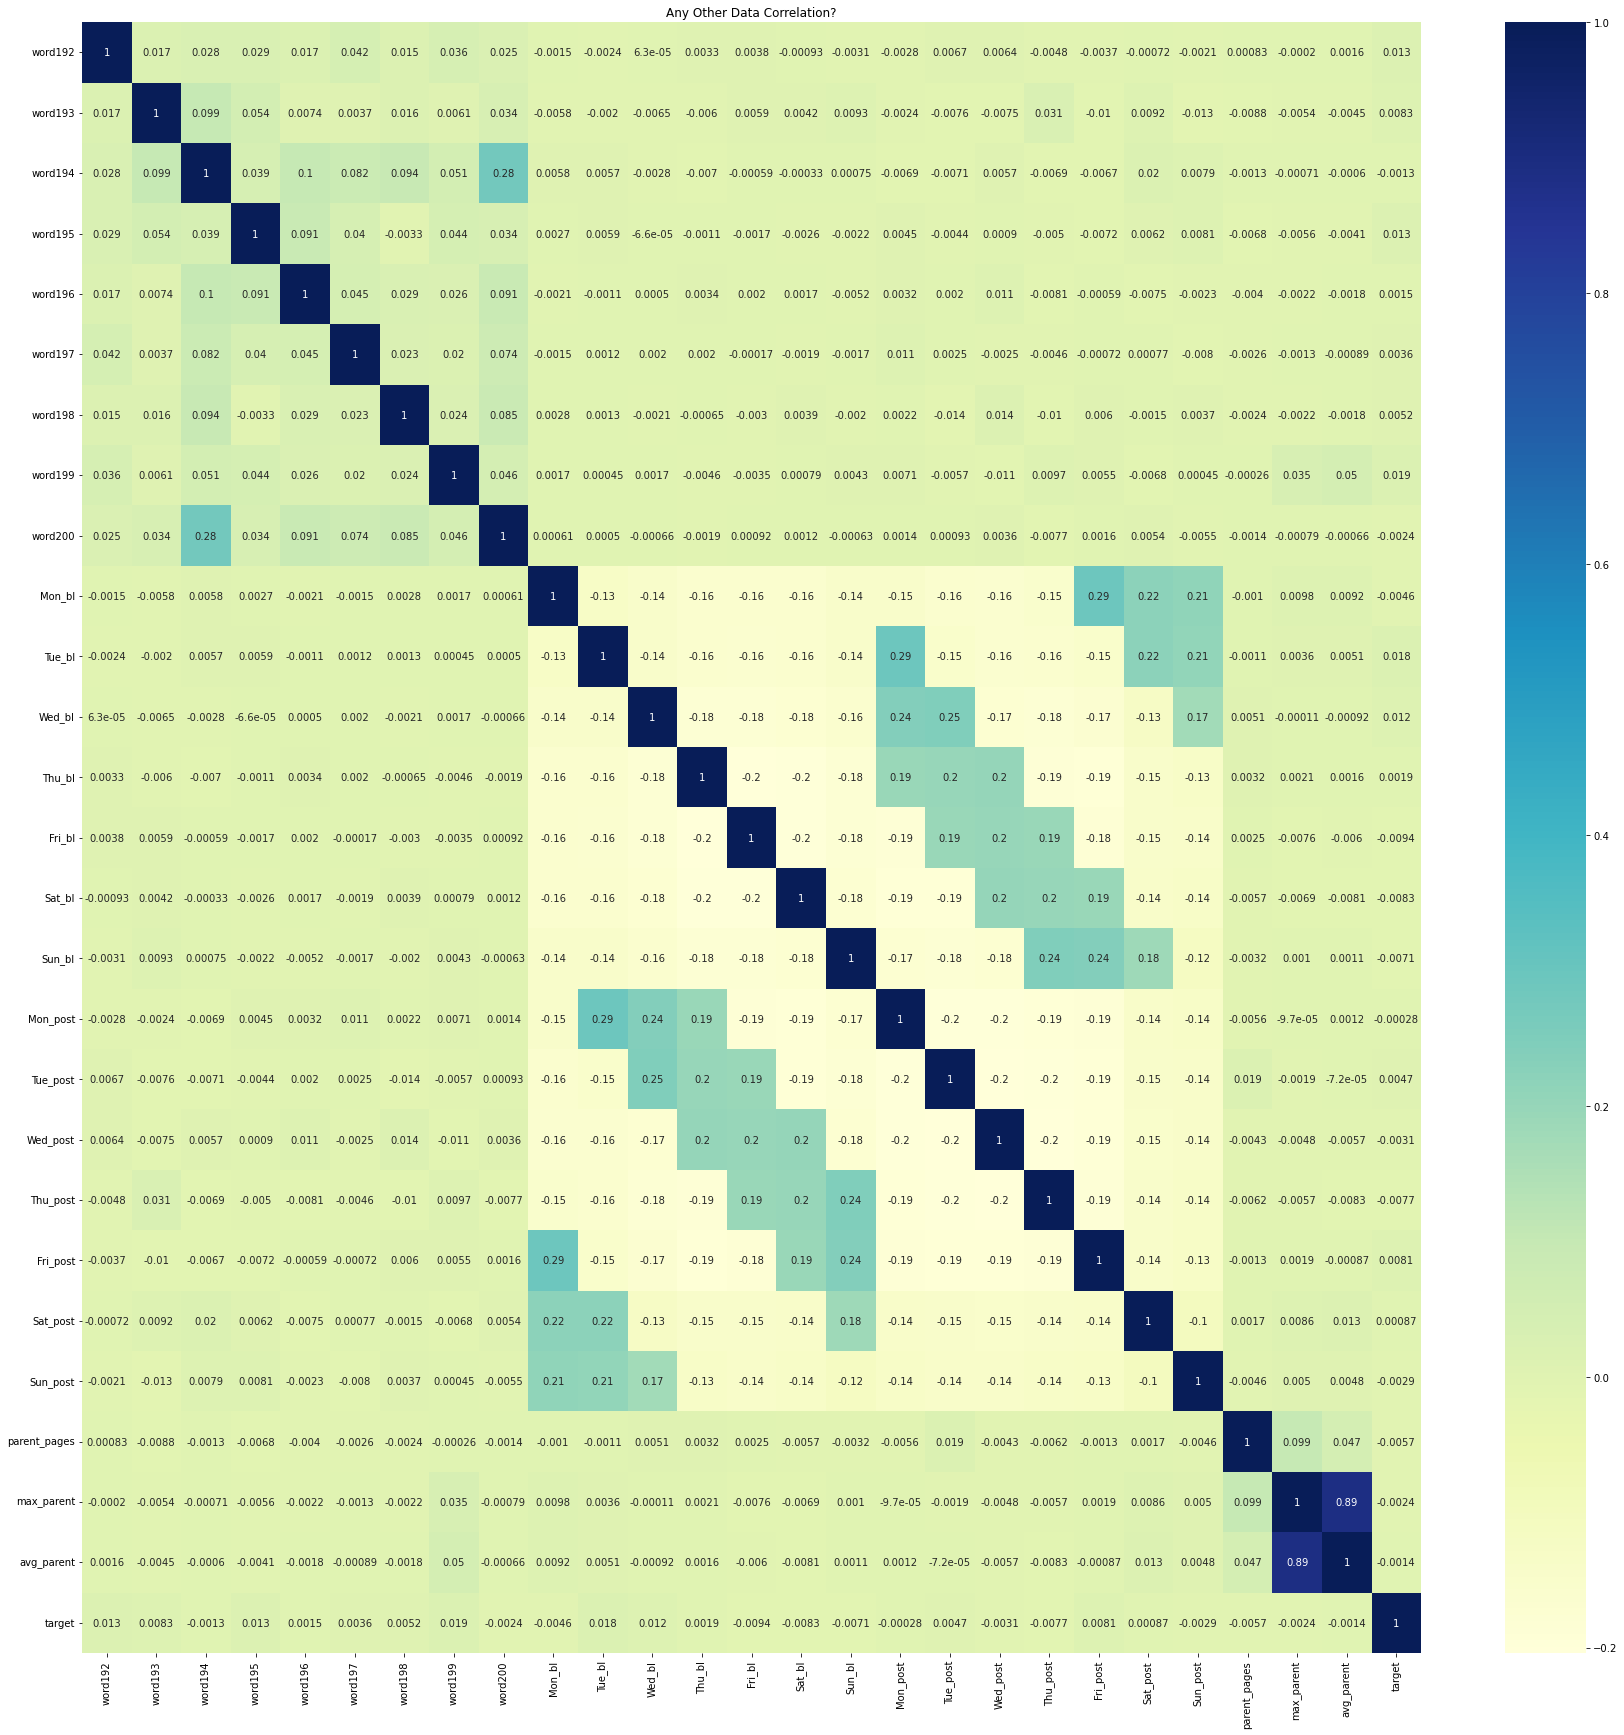

In [18]:
plt.figure(figsize=(30,30))
sns.heatmap(data5.corr(), annot=True, cmap="YlGnBu").set_title('Any Other Data Correlation?')

In [19]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [20]:
#dropping the 1 correlations that are equal 1 for all subsets that contain words features
correlated_features = correlation(data2, 1)
print(len(set(correlated_features)))
data.drop(correlated_features, inplace=True, axis=1)
#dropping for subset3 data3
correlated_features = correlation(data3, 1)
print(len(set(correlated_features)))
data.drop(correlated_features, inplace=True, axis=1)
#dropping for subset3 data4
correlated_features = correlation(data4, 1)
print(len(set(correlated_features)))
data.drop(correlated_features, inplace=True, axis=1)

6
8
3


In [21]:
data.shape

(52396, 246)

In [22]:
data.drop([ 'max_parent', 'avg_parent'], inplace=True, axis=1)

In [23]:
data.shape

(52396, 244)

In [24]:
wdata=data.iloc[:,45:228]
wdata.head()

word1  word2  word3  word4  word5  word6  word7  word8  word9  word10  ...  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0  ...   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0  ...   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0  ...   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0  ...   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0  ...   

   word191  word192  word193  word194  word195  word196  word197  word198  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   word199  word200  
0      0.0      0.0  
1      0.0      0.0  
2      0.0      0.0  
3      0.0      0.0  
4      0.0      0.0  

[5 rows x 183 columns]

In [25]:
#Redundant, similar to other word columns 
#Highly correlated to other words
correlated_features = correlation(wdata, 0.5)
print(len(set(correlated_features)))
print(correlated_features)
data.drop(correlated_features, inplace=True, axis=1)

27
{'word164', 'word161', 'word191', 'word67', 'word81', 'word68', 'word86', 'word28', 'word49', 'word150', 'word106', 'word30', 'word87', 'word70', 'word93', 'word194', 'word47', 'word39', 'word33', 'word184', 'word62', 'word25', 'word94', 'word182', 'word22', 'word170', 'word151'}


In [26]:
correlated_features = correlation(data.iloc[:,:-1], 0.6)
print(len(set(correlated_features)))
print(correlated_features)

38
{'blog_avg_first24h_tr', 'blog_std_total_tr', 'blog_avg_total_tr', 'blog_max_last24h_tr', '24-48h_tr', 'blog_median_total', 'blog_median_difference_tr', 'blog_avg_difference_tr', 'total', 'blog_avg_24-48h_tr', 'blog_max_difference', 'blog_max_total', 'blog_std_difference_tr', 'blog_max_total_tr', 'blog_std_total', 'blog_std_last24h_tr', 'difference', 'blog_avg_last24h_tr', 'blog_min_difference_tr', 'total_tr', 'last24h_tr', 'blog_std_first24h_tr', 'blog_max_24-48h_tr', 'blog_min_first24h_tr', 'blog_median_last24h_tr', 'blog_min_difference', 'blog_max_first24h_tr', 'blog_median_first24h_tr', 'blog_std_24-48h_tr', 'blog_median_total_tr', 'first24h', 'blog_max_difference_tr', 'blog_avg_difference', 'last24h', 'difference_tr', 'first24h_tr', 'blog_std_difference', '24-48h'}


In [27]:
corFeatures=['blog_std_total_tr', 'blog_std_total', 'blog_max_last24h_tr', 'blog_std_difference', 'blog_median_last24h_tr', 'blog_max_24-48h_tr', 'blog_max_total_tr', 'blog_max_first24h_tr', '24-48h_tr', 'blog_std_difference_tr', 'blog_median_total', 'blog_max_total', 'blog_median_total_tr', 'difference_tr', 'blog_median_first24h_tr', 'blog_std_24-48h_tr', 'last24h_tr', 'difference', 'total_tr', 'total', 'blog_median_difference_tr', 'first24h', 'blog_min_difference_tr', '24-48h', 'blog_min_difference', 'first24h_tr', 'blog_std_first24h_tr', 'blog_max_difference_tr', 'last24h', 'blog_max_difference', 'blog_std_last24h_tr', 'blog_min_first24h_tr']
data.drop(corFeatures, inplace=True, axis=1)

In [28]:
data.shape

(52396, 185)

### Data Visualization

Text(0.5, 1.0, 'Day vs Number of Comments')

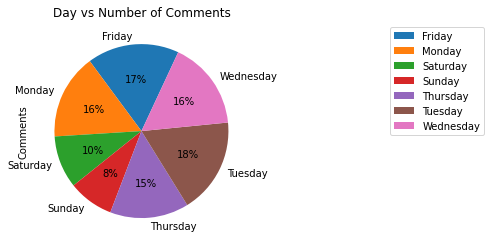

In [29]:
#Pie chart of ratio of comments per weekday
SundaySum=0
MondaySum=0
TuesdaySum=0
WednesdaySum=0
ThursdaySum=0
FridaySum=0
SaturdaySum=0

for x in range(len(data['target'])):
    if(data['Sun_post'][x]==1):
        SundaySum=SundaySum+data['target'][x]
    if(data['Mon_post'][x]==1):
        MondaySum=MondaySum+data['target'][x]
    if(data['Tue_post'][x]==1):
        TuesdaySum=TuesdaySum+data['target'][x]
    if(data['Wed_post'][x]==1):
        WednesdaySum=WednesdaySum+data['target'][x]
    if(data['Thu_post'][x]==1):
        ThursdaySum=ThursdaySum+data['target'][x]
    if(data['Fri_post'][x]==1):
        FridaySum=FridaySum+data['target'][x]
    if(data['Sat_post'][x]==1):
        SaturdaySum=SaturdaySum+data['target'][x]

dataframe = pd.DataFrame({'Day': ["Sunday", "Monday", "Tuesday","Wednesday", "Thursday", "Friday", "Saturday"],
                          'Comments': [SundaySum, MondaySum, TuesdaySum,WednesdaySum, ThursdaySum, FridaySum, SaturdaySum]})
  
# Plotting the pie chart for above dataframe
dataframe.groupby(['Day']).sum().plot(kind='pie', y='Comments', autopct='%1.0f%%', startangle=65)
plt.legend(bbox_to_anchor=(2.1, 1.0))
plt.title("Day vs Number of Comments")

Observation: -Most comments were written on weekdays, as Saturday and Sunday (weekend days) have the least number of comments.    

## REGRESSION W/O FEATURE SELECTION

In [30]:
#Importing regression stuff
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

#### KNN model 

In [31]:
#Spliting the dataset into training and testing sets (segments)
#Training the segments 
X = data.iloc[:,0:-1]
Y = data["target"] 
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [32]:
#Scale all the features 
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

Text(0, 0.5, 'Loss')

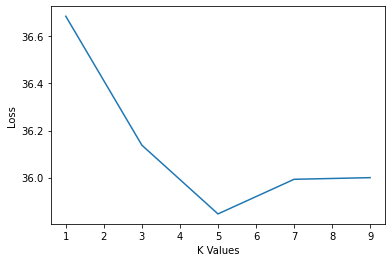

In [33]:
#Capturing all the k values that have the best LOSS (not accuracy) (k=odd numbers only from 1-10)
rmse_val = [] #to store rmse values for different k
k_range = range(1, 10, 2)
for K in k_range:
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
plt.plot(k_range, rmse_val)
plt.xlabel('K Values')
plt.ylabel('Loss')

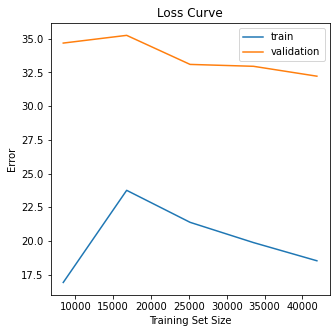

In [34]:
#Learning Curve
#K=2 (I DONT WANT OVERFITTING FROM THE GETGO)
model = neighbors.KNeighborsRegressor(n_neighbors = 2)
model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set

train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=data.iloc[:,0:-1],
    y=data['target'],
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(5,5))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Loss Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

In [35]:
#Metric 1
results = model_selection.cross_val_score(model, x_train, y_train, cv=4, scoring="neg_mean_absolute_error")
print("Mean Absolute Error: ", results.mean()); print("Standard Deviation: ", results.std())
#Metric 2
results = model_selection.cross_val_score(model, x_train, y_train, cv=4, scoring="neg_mean_squared_error")
print(); print("Mean Squared Error: ", results.mean()); print("Standard Deviation: ", results.std())
x=results.mean()
#Metric 3
results = model_selection.cross_val_score(model, x_train, y_train, cv=4, scoring="r2")
print(); print("R squared val: ", results.mean()); print("Standard Deviation: ", results.std())
#Metric 4
RMSE = np.sqrt(mean_squared_error(pred, y_test))
print("Root Mean Square Error is: {:.3f}".format(RMSE))

Mean Absolute Error:  -8.075066508980449
Standard Deviation:  0.33913242680706085

Mean Squared Error:  -1352.2467960947279
Standard Deviation:  85.30155774676956

R squared val:  0.008711863408811804
Standard Deviation:  0.0553175198205294
Root Mean Square Error is: 36.686


#### DT model 

In [36]:
x=data.iloc[:,:-1].astype(int)
y=data.target
#spliting data
X_train, X_test, y_train, y_test = train_test_split(
    x, y, random_state=42)

In [37]:
#testing the tree depth to choose best one
LowestRMSE=0
indexmDepth=3
for i in range (3,10):
    tree = DecisionTreeRegressor(random_state=42, max_depth=i)
    # fit the regressor with X and Y data
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_pred,y_test))
    print("Root Mean Square Error is: {:.3f}".format(RMSE)+" "+str(i))
    if i==3:
        LowestRMSE=RMSE
    elif RMSE < LowestRMSE :
        LowestRMSE=RMSE
        indexmDepth=i
print(indexmDepth)

Root Mean Square Error is: 30.549 3
Root Mean Square Error is: 30.477 4
Root Mean Square Error is: 30.564 5
Root Mean Square Error is: 31.864 6
Root Mean Square Error is: 33.301 7
Root Mean Square Error is: 34.191 8
Root Mean Square Error is: 33.768 9
4


In [38]:
#apply best max depth
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=5)
# fit the regressor with X and Y data
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)

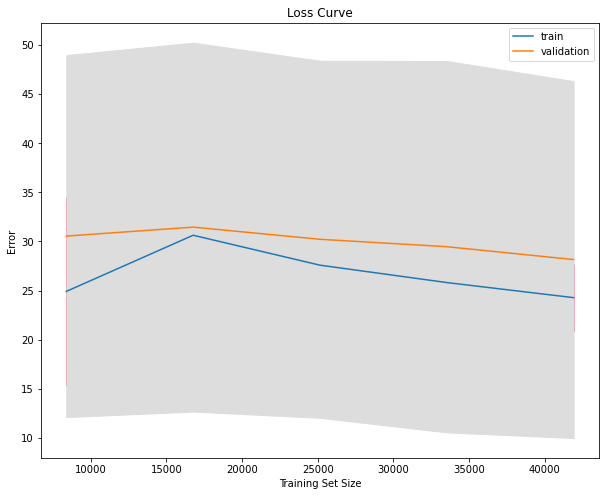

In [39]:
#Error learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=tree_reg,
    X=x,
    y=y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Loss Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

In [40]:
#Performance measurments
mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
RMSE = np.sqrt(mse)
RMSE = np.sqrt(mean_squared_error(y_pred,y_test))

print("Root Mean Square Error is: {:.3f}".format(RMSE))
print("Mean Square Error is: {:.3f}".format(mse))
print("Mean Absolute Error is: {:.3f}".format(mae))

Root Mean Square Error is: 30.564
Mean Square Error is: 934.157
Mean Absolute Error is: 7.044


#### LR MODEL

In [41]:
#Spliting the dataset into training and testing sets 
#train test split
x = data.iloc[:,0:-1]
y = data['target']
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.3, random_state = 42)
#training the model
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)

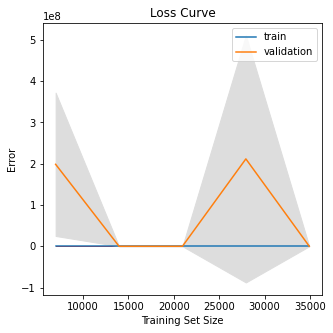

In [42]:
#lOSS CURVE
model2 = LinearRegression()
model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model2,
    X=x,
    y=y,
    cv=3,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(5,5))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Loss Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

In [43]:
#Negative Mean Squared Error Evaluation
scoring = "neg_mean_squared_error"
kfold = model_selection.KFold(n_splits=10)
results = model_selection.cross_val_score(lr_model, x_train, y_train, cv=kfold, scoring=scoring)
print("Negative Mean Squared Error: ", results.mean()); print("Standard Deviation: ", results.std())
#Root Mean Squared Error Evaluation
RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Square Error is: {:.3f}".format(RMSE))
#Mean Absolute Error Evaluation
scoring = "neg_mean_absolute_error"
results = model_selection.cross_val_score(lr_model, x_train, y_train, cv=kfold, scoring=scoring)
print("Mean Absolute Error: ", results.mean()); print("Standard Deviation: ", results.std())
#R  Evaluation
scoring = "r2"
results = model_selection.cross_val_score(lr_model, x_train, y_train, cv=kfold, scoring=scoring)
print(); print("R squared val: ", results.mean()); print("Standard Deviation: ", results.std())

Negative Mean Squared Error:  -983.896909915173
Standard Deviation:  178.78219803765765
Root Mean Square Error is: 33.466
Mean Absolute Error:  -10.641359382875255
Standard Deviation:  0.4927340846209271

R squared val:  0.28677367616785443
Standard Deviation:  0.047464755179377746


### Feature Selection

In [44]:
#import the libaries i'll be using here
from sklearn.model_selection import train_test_split
! pip install mlxtend
! pip install scikit-learn
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [45]:
#Split dataset into inputs and the output (target)
X = data.iloc[:,0:-1]
Y = data["target"]
#Split train and test sets (lower overfitting)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42,test_size = 0.3)

In [46]:
#Best feature selection via conditions (stated below)
#sfs CANNOT REMOVE FEATURES ONCE ADDED TO INCREASE THE ACCURACY (EFS is better for that but it has a slow computution time)
#cv=number of segments the cross validation algorithm working with
sfs = SFS(KNeighborsRegressor(n_neighbors=3),
          k_features = (1, 9),
          forward= True,
          verbose= 2,
          scoring= 'neg_root_mean_squared_error',
          cv = 4,
          n_jobs= -1
).fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:  9.5min finished

[2022-11-14 18:26:40] Features: 1/9 -- score: -33.84257165616178[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:  3.1min finished

[2022-11-14 18:29:45] Features: 2/9 -- score: -31.25991554585999[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:   21.5s finished

[2022-11-14 18:30:07] Features: 3/9 -- score: -27.882021

In [47]:
sfs.k_feature_names_

('blog_avg_difference',
 'blog_avg_total_tr',
 'blog_avg_difference_tr',
 'time_first_post',
 'word15',
 'word31',
 'word74',
 'word130',
 'word146')

In [48]:
#Create dataframe from the selected features
BESTFEATURES = X[['blog_avg_total','time_first_post','word7','word41','word108','word168','Tue_post','Fri_post','Sun_post']]
BESTFEATURES.head()

blog_avg_total  time_first_post  word7  word41  word108  word168  Tue_post  \
0        40.30467             35.0    0.0     0.0      0.0      0.0       0.0   
1        40.30467             35.0    0.0     0.0      0.0      0.0       0.0   
2        40.30467             10.0    0.0     0.0      0.0      0.0       0.0   
3        40.30467             34.0    0.0     0.0      0.0      0.0       0.0   
4        40.30467             59.0    0.0     0.0      0.0      0.0       0.0   

   Fri_post  Sun_post  
0       0.0       0.0  
1       0.0       0.0  
2       0.0       0.0  
3       0.0       0.0  
4       0.0       0.0

## REGRESSION W/ FEATURE SELECTION

#### KNN model

In [49]:
##Spliting the dataset into training and testing sets (segments)----------------------------------------------------KNN+SFS
#Spliting the dataset into training and testing sets (segments)
#Training the segments 
X = BESTFEATURES
Y = data["target"] 
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42)
#Scale all the features 
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

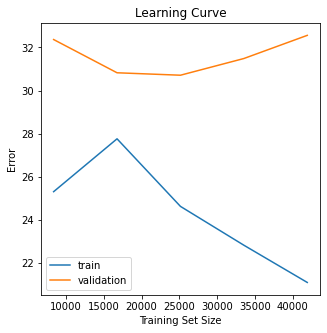

In [50]:
#Learning Curve
#K=2 (I DONT WANT OVERFITTING FROM THE GETGO)
model = neighbors.KNeighborsRegressor(n_neighbors = 2)
model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set

train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=BESTFEATURES,
    y=data['target'],
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(5,5))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

In [51]:
#Metric 1
results = model_selection.cross_val_score(model, x_train, y_train, cv=4, scoring="neg_mean_absolute_error")
print("Mean Absolute Error: ", results.mean()); print("Standard Deviation: ", results.std())
#Metric 2
results = model_selection.cross_val_score(model, x_train, y_train, cv=4, scoring="neg_mean_squared_error")
print(); print("Mean Squared Error: ", results.mean()); print("Standard Deviation: ", results.std())
x=results.mean()
#Metric 3
results = model_selection.cross_val_score(model, x_train, y_train, cv=4, scoring="r2")
print(); print("R squared val: ", results.mean()); print("Standard Deviation: ", results.std())
#Metric 4
RMSE = np.sqrt(mean_squared_error(pred, y_test))
print("Root Mean Square Error is: {:.3f}".format(RMSE))

Mean Absolute Error:  -7.281916515662946
Standard Deviation:  0.302007542027391

Mean Squared Error:  -955.4816588801326
Standard Deviation:  83.08070247315966

R squared val:  0.30059161877539703
Standard Deviation:  0.0412072200924909
Root Mean Square Error is: 35.092


#### DT model 

In [52]:
#testing if step 
x=data.iloc[:,:-1].astype(int)
y=data.target
#spliting data
X_train, X_test, y_train, y_test = train_test_split(
    x, y, random_state=42)

tree_SfS = DecisionTreeRegressor(random_state=42, max_depth=5)
sbs = SFS(DecisionTreeRegressor(random_state=42, max_depth=5),
         k_features = (1, 15),
          forward= True,
          verbose= 2,
          scoring= 'neg_root_mean_squared_error',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:    1.1s finished

[2022-11-14 18:34:25] Features: 1/15 -- score: -31.661630326248655[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 out of 183 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    1.8s finished

[2022-11-14 18:34:27] Features: 2/15 -- score: -26.012985959678886[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    3.1s finished

[2022-11-14 18:34:30] Features: 3/15 -- score: -25.629805403273846[Parallel(n_jobs=-1)]: Using 

In [53]:
X_train_sfs = sbs.transform(X_train)
X_test_sfs = sbs.transform(X_test)
#apply best max depth
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=5)
# fit the regressor with X and Y data
tree_reg.fit(X_train_sfs, y_train)
y_pred = tree_reg.predict(X_test_sfs)

## RMSE:which is a metric that tells us the average distance between the predicted values from the model and the actual values in the dataset.
## Root Mean Square Error is: 30.564
## the Learning curve is balanced (returned balanced)

In [54]:
#Performance measures for the DTRegressor
mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
RMSE = np.sqrt(mse)

print("Root Mean Square Error is: {:.3f}".format(RMSE))
print("Mean Square Error is: {:.3f}".format(mse))
print("Mean Absolute Error is: {:.3f}".format(mae))

Root Mean Square Error is: 29.621
Mean Square Error is: 877.393
Mean Absolute Error is: 6.892


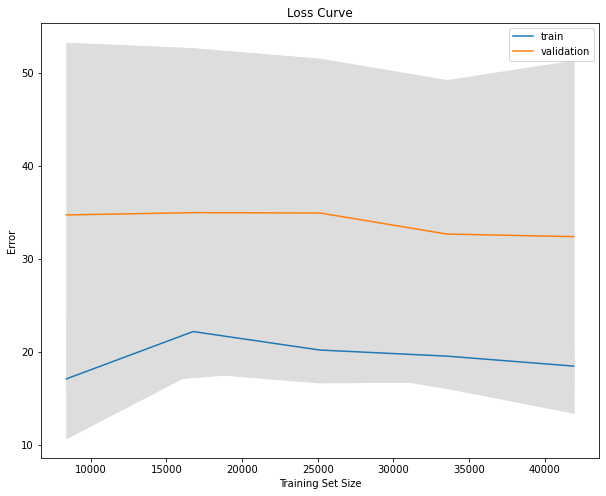

In [55]:
#The Learning Curve of the DTRegressor
train_sizes, train_scores, test_scores = learning_curve(
    estimator=tree,
    X=x,
    y=y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Loss Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

#### LR model

In [56]:
##Spliting the dataset into training and testing sets 
x=data.iloc[:,:-1]
y=data['target']
#spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
#Feature Selection
sfs = SFS(LinearRegression(),
         k_features = (1, 10),
          forward= True,
          verbose= 2,
          scoring= 'neg_root_mean_squared_error',
          cv = 5,
          n_jobs= -1
         ).fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:    3.3s finished

[2022-11-14 18:36:41] Features: 1/10 -- score: -31.801067576827656[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    3.5s finished

[2022-11-14 18:36:45] Features: 2/10 -- score: -31.270021075241107[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    3.8s finished

[2022-11-14 18:36:49] Features: 3/10 -- score: -31.127201405521312[Parallel(n_jobs=-1)]: Using backend LokyBackend

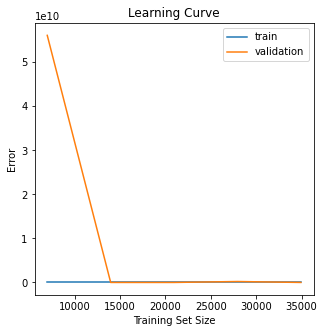

In [57]:
#Loss Curve
x_train_sfs = sfs.transform(x_train) 
x_test_sfs = sfs.transform(x_test)
lr_model_sfs = LinearRegression()
lr_model_sfs.fit(x_train_sfs,y_train)  #fit the model
y_pred = lr_model_sfs.predict(x_test_sfs) #make prediction on test set

train_sizes, train_scores, test_scores = learning_curve(
    estimator= lr_model_sfs,
    X=x,
    y=y,
    cv=3,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
    n_jobs = -1
   
)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(5,5))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

The Linear Regression model is overfitting, as the model is assuming that there is a linear relationship between the independent variables (features) and the dependent variable (target), but the data is more complex than this, and thus the model is unable to see past the noise of the dataset.

In [58]:
#Negative Mean Squared Error Evaluation
scoring = "neg_mean_squared_error"
kfold = model_selection.KFold(n_splits=10)
results = model_selection.cross_val_score(lr_model_sfs, x_train_sfs, y_train, cv=kfold, scoring=scoring)
print("Negative Mean Squared Error: ", results.mean()); print("Standard Deviation: ", results.std())
#Root Mean Squared Error Evaluation
RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Square Error is: {:.3f}".format(RMSE))
#Mean Absolute Error Evaluation
scoring = "neg_mean_absolute_error"
results = model_selection.cross_val_score(lr_model_sfs, x_train_sfs, y_train, cv=kfold, scoring=scoring)
print("Mean Absolute Error: ", results.mean()); print("Standard Deviation: ", results.std())
#R  Evaluation
scoring = "r2"
results = model_selection.cross_val_score(lr_model_sfs, x_train_sfs, y_train, cv=kfold, scoring=scoring)
print(); print("R squared val: ", results.mean()); print("Standard Deviation: ", results.std())

Negative Mean Squared Error:  -966.1215308086661
Standard Deviation:  96.48988045183674
Root Mean Square Error is: 34.169
Mean Absolute Error:  -10.368052602617961
Standard Deviation:  0.4333610127426086

R squared val:  0.29401392754270894
Standard Deviation:  0.04471035470535232
